<a href="https://colab.research.google.com/github/RocafellaGitub/MaikanoRocafellaSteve/blob/main/CLASS_5_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset from document

In [ ]:
df=pd.read_csv('fitness_class_2212.csv')

Display the datatype and Datasets

In [ ]:
print(df.dtypes)
print("\n dataset shape:", df.shape)

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

 dataset shape: (1500, 8)


In [ ]:
print("\n the first five records of the datasets")
df.head()


 the first five records of the datasets


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


DESCRIPTIVE ANALYSIS OF THE DATASET

In [ ]:
print("\n descriptive analysis of the dataset")
df.describe()


 descriptive analysis of the dataset


,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [ ]:
print("\n the last five records of the datasets")
df.tail()


 the last five records of the datasets


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0
1499,1500,20,94.39,8,Thu,AM,Cycling,1


In [ ]:
print("\n the information of the dataset")
df.info()


 the information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


Check for the NULL values of the dataset

In [ ]:
print("\n the null values of the dataset")
df.isnull().sum()


 the null values of the dataset


,0
booking_id,0
months_as_member,0
weight,20
days_before,0
day_of_week,0
time,0
category,0
attended,0


#Since i discovered there are null values within the datasets, there are two techniques i can deploy.
1. delete the entire row or
2. imputation technique.
however i choose to delete the null values

In [ ]:
print("\n the null values of the dataset")
df = df.dropna()


 the null values of the dataset


PREPROCESS THE DATASET TO MAKE IT READY FOR TRAINING

TO TRY LABEL ENCODING

In [ ]:
# Preprocessing
# Encode categorical variables using label encoding, feel free to try one-hot encoding
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,28,8,1,4,0
1,2,10,79.01,14,2,0,3,0
2,3,16,74.53,9,5,0,4,0
3,4,5,86.12,2,0,0,2,0
4,5,15,69.29,28,6,0,3,0


TO TRY ONE-HOT ENCODING

In [ ]:
one_encoded=pd.get_dummies(df, columns=['category','weight','booking_id','months_as_member','days_before','time'])
one_encoded.head()

,day_of_week,attended,category_0,category_1,category_2,category_3,category_4,category_5,weight_55.41,weight_57.83,...,days_before_23,days_before_24,days_before_25,days_before_26,days_before_27,days_before_28,days_before_29,days_before_30,time_0,time_1
0,8,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,2,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,5,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


NEXT PERFORM LABEL ENCODING TO CONVERT TO NUMBERS- # ASSIGNMENT

In [ ]:
one_encoded.head()

,day_of_week,attended,category_0,category_1,category_2,category_3,category_4,category_5,weight_55.41,weight_57.83,...,days_before_23,days_before_24,days_before_25,days_before_26,days_before_27,days_before_28,days_before_29,days_before_30,time_0,time_1
0,8,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,2,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,5,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


Feature and target

In [ ]:
X = df.drop('attended', axis=1)  # Replace 'Attendance' with your target column name
y = df['attended']

TRAIN, TEST AND SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

FEATURE SCALING

---



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

BALANCE THE DATASET- SMOTE using imlearn

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

LOGISTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr_balanced = LogisticRegression(random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_lr_balanced = lr_balanced.predict(X_test_scaled)

print("\nLogistic Regression Performance (With Balancing):")
print(classification_report(y_test, y_pred_lr_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_balanced))


Logistic Regression Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       308
           1       0.61      0.65      0.63       136

    accuracy                           0.76       444
   macro avg       0.72      0.73      0.73       444
weighted avg       0.77      0.76      0.77       444

Confusion Matrix:
[[251  57]
 [ 48  88]]


USING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)

print("\nRandom Forest Performance (With Balancing):")
print(classification_report(y_test, y_pred_rf_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_balanced))


Random Forest Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       308
           1       0.58      0.61      0.59       136

    accuracy                           0.74       444
   macro avg       0.70      0.71      0.70       444
weighted avg       0.75      0.74      0.75       444

Confusion Matrix:
[[247  61]
 [ 53  83]]


CONFUSION MATRIX - LABEL WISE OPERFORMANCE OF THE RANDOM FOREST MODEL

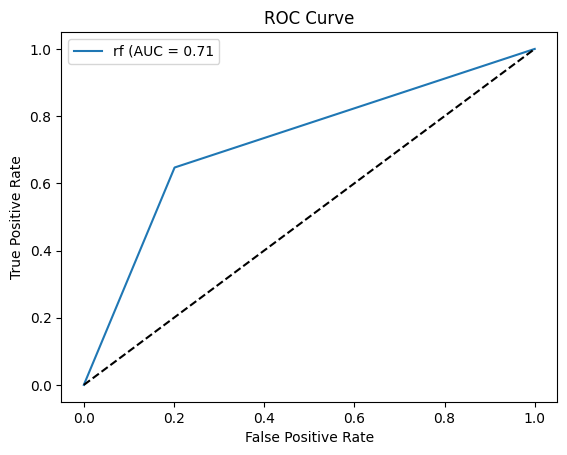

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_lr)
plt.plot(fpr, tpr, label=f'{'rf'} (AUC = {roc_auc_score(y_test, y_pred_best_rf):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

CONFUSION MATRIX - RANDOM FOREST


<Axes: >

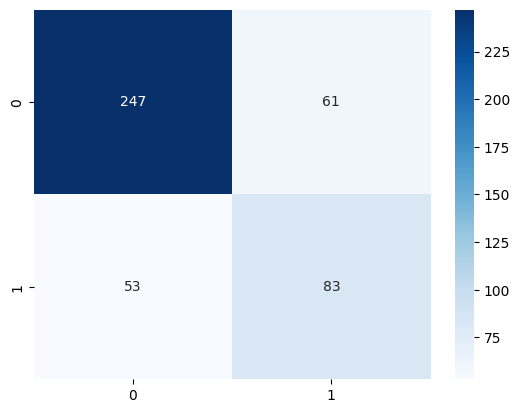

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_balanced)
cm=confusion_matrix(y_test, y_pred_rf_balanced)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

PERFORM CORRELATION

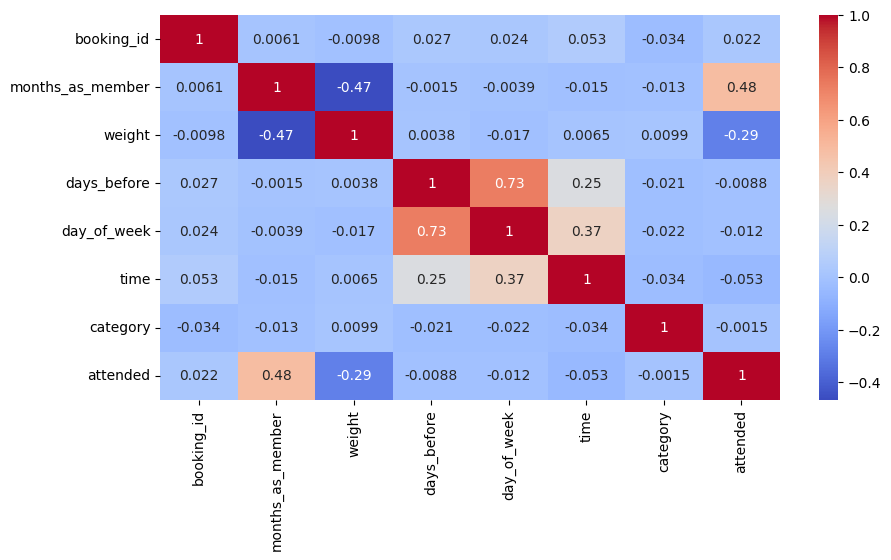

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

bar chart


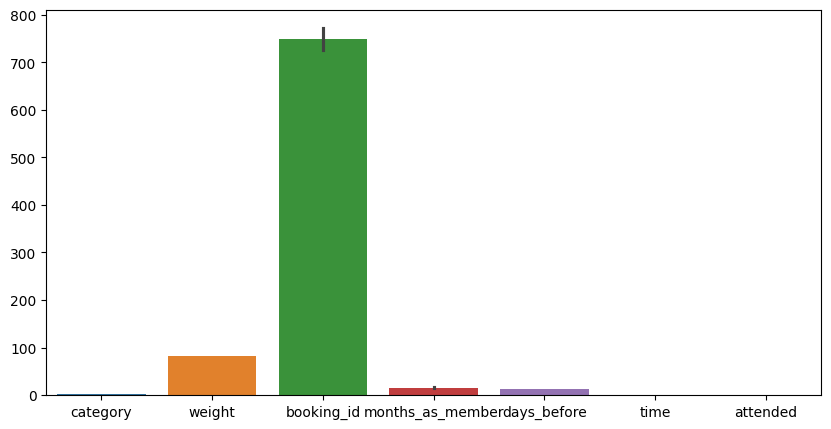

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.barplot(data=df[['category','weight','booking_id','months_as_member','days_before','time','attended']])
plt.show()

# HYPERPARAMETER TUNING - RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Evaluate tuned Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("\nTuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       308
           1       0.59      0.60      0.59       136

    accuracy                           0.75       444
   macro avg       0.71      0.71      0.71       444
weighted avg       0.75      0.75      0.75       444

Confusion Matrix:
[[252  56]
 [ 55  81]]


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gbt_balanced = GradientBoostingClassifier(random_state=42)
gbt_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_gbt_balanced = gbt_balanced.predict(X_test_scaled)

print("\nGradient Boosting Performance (With Balancing):")
print(classification_report(y_test, y_pred_gbt_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt_balanced))


Gradient Boosting Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       308
           1       0.57      0.60      0.58       136

    accuracy                           0.74       444
   macro avg       0.69      0.70      0.69       444
weighted avg       0.74      0.74      0.74       444

Confusion Matrix:
[[246  62]
 [ 55  81]]


DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt_balanced = DecisionTreeClassifier(random_state=42)
dt_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_dt_balanced = dt_balanced.predict(X_test_scaled)

print("\nDecision Tree Performance (With Balancing):")
print(classification_report(y_test, y_pred_dt_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_balanced))


Decision Tree Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       308
           1       0.47      0.48      0.47       136

    accuracy                           0.68       444
   macro avg       0.62      0.62      0.62       444
weighted avg       0.68      0.68      0.68       444

Confusion Matrix:
[[235  73]
 [ 71  65]]


# CROSS VALIDATION FOR TUNING MODEL
 LOGISTICS REGRESSION AND GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression # Corrected import

param_grid_lr={
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'], # Regularization type
    'solver': ['liblinear'] # Solver that supports both l1 and l2 penalties
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_balanced, y_train_balanced)

print("\n Best parameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Evaluate the tuned models
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test_scaled)

print("\nTuned Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_lr))


 Best parameters for Logistic Regression:
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       308
           1       0.59      0.65      0.62       136

    accuracy                           0.75       444
   macro avg       0.71      0.72      0.72       444
weighted avg       0.76      0.75      0.76       444

Confusion Matrix:
[[246  62]
 [ 48  88]]


#CONFUSION MATRIX FOR LOGISTICS REGRESSION

<Axes: >

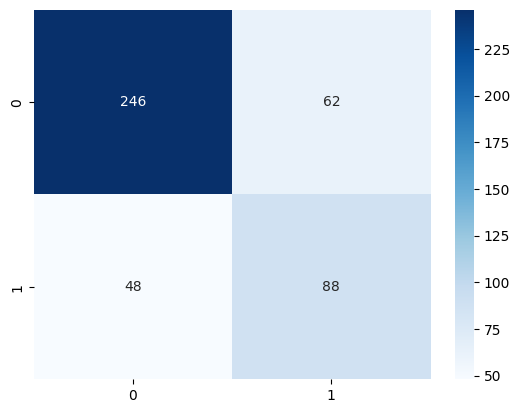

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_best_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

ROC CURVE

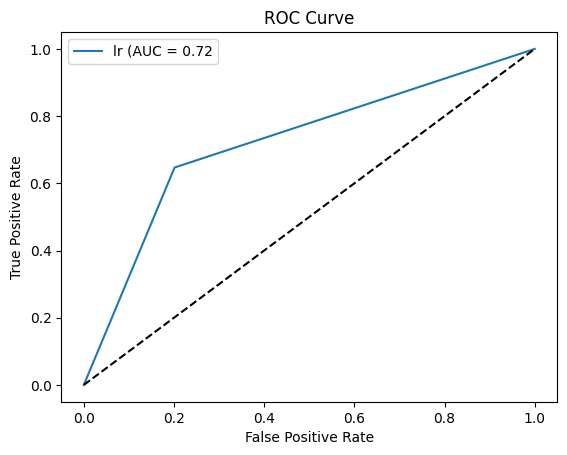

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_lr)
plt.plot(fpr, tpr, label=f'{'lr'} (AUC = {roc_auc_score(y_test, y_pred_best_lr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid_gbt = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_gbt = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbt, cv=5)
grid_search_gbt.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Random Forest:")
print(grid_search_gbt.best_params_)

# Evaluate tuned Random Forest
y_pred_best_gbt = grid_search_gbt.best_estimator_
y_pred_best_gbt = y_pred_best_gbt.predict(X_test_scaled)

print("\nTuned GradientBoosting Performance:")
print(classification_report(y_test, y_pred_best_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gbt))


Best Parameters for Random Forest:
{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}

Tuned GradientBoosting Performance:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       308
           1       0.57      0.55      0.56       136

    accuracy                           0.74       444
   macro avg       0.69      0.68      0.69       444
weighted avg       0.73      0.74      0.74       444

Confusion Matrix:
[[252  56]
 [ 61  75]]


CONFUSION MATRIX FOR THE GBT

<Axes: >

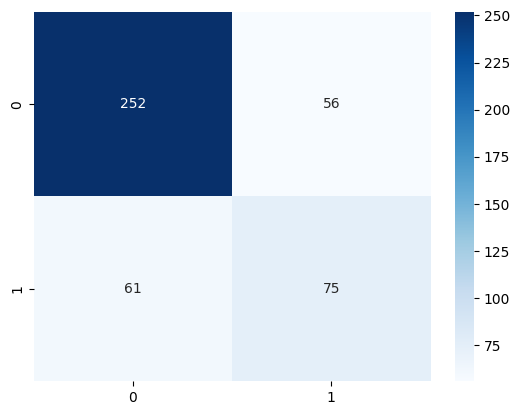

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_best_gbt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

ROC CURVE GRADIENT BOOSTING

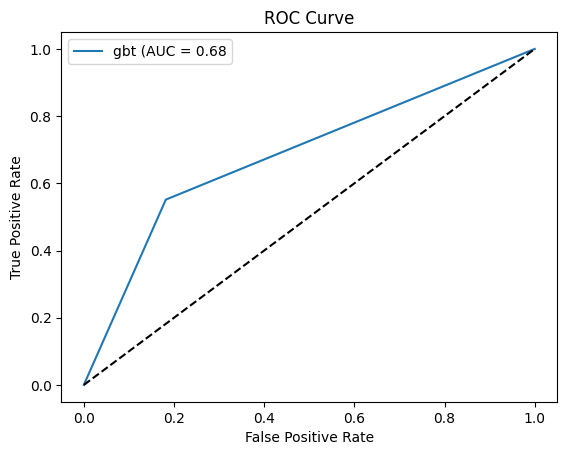

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_gbt)
plt.plot(fpr, tpr, label=f'{'gbt'} (AUC = {roc_auc_score(y_test, y_pred_best_gbt):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
#